Spark Data Sources API

https://databricks.com/blog/2015/01/09/spark-sql-data-sources-api-unified-data-access-for-the-spark-platform.html

In [1]:
f = open('census_2010.json')

for i in range(0,4):
    print(f.readline())

{"females": 1994141, "total": 4079669, "males": 2085528, "age": 0, "year": 2010}

{"females": 1997991, "total": 4085341, "males": 2087350, "age": 1, "year": 2010}

{"females": 2000746, "total": 4089295, "males": 2088549, "age": 2, "year": 2010}

{"females": 2002756, "total": 4092221, "males": 2089465, "age": 3, "year": 2010}



In [10]:
# Modified code
from pyspark import SparkContext, SparkConf, SQLContext
conf = SparkConf().setAppName("pyspark")
sc = SparkContext(conf=conf)

# Example code from Dataquest gives name error (sc) not defined
# Import SQLContext
# from pyspark.sql import SQLContext


# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)

# Read JSON data into a DataFrame object `df`
df = sqlCtx.read.json("census_2010.json")

# Print the type
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [11]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- females: long (nullable = true)
 |-- males: long (nullable = true)
 |-- total: long (nullable = true)
 |-- year: long (nullable = true)



In [12]:
df.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



In [13]:
# First five ages

first_five = df.head(5)

for r in first_five:
    print(r.age)

0
1
2
3
4


In [14]:
df[['age', 'males', 'females']].show()

+---+-------+-------+
|age|  males|females|
+---+-------+-------+
|  0|2085528|1994141|
|  1|2087350|1997991|
|  2|2088549|2000746|
|  3|2089465|2002756|
|  4|2090436|2004366|
|  5|2091803|2005925|
|  6|2093905|2007781|
|  7|2097080|2010281|
|  8|2101670|2013771|
|  9|2108014|2018603|
| 10|2114217|2023289|
| 11|2118390|2026352|
| 12|2132030|2037286|
| 13|2159943|2060100|
| 14|2195773|2089651|
| 15|2229339|2117689|
| 16|2263862|2146942|
| 17|2285295|2165852|
| 18|2285990|2168175|
| 19|2272689|2159571|
+---+-------+-------+
only showing top 20 rows



In [15]:
# Bool select like pandas

five_plus = df[df['age'] > 5]
five_plus.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
| 20|2151448|2259690|4411138|2010|
| 21|2140926|2244039|4384965|2010|
| 22|2133510|2229168|4362678|2010|
| 23|2132897|2218195|4351092|2010|
| 24|2135789|2208905|4344694|2010|
| 25|2136497|2197148|4333645|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



In [16]:
# Compare columns

df[df['females'] < df['males']].show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



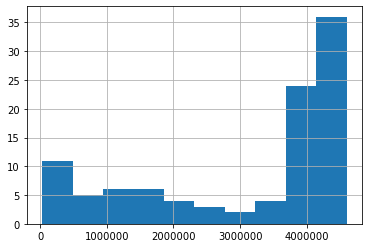

In [17]:
# Convert to pandas df - Spark can't do histograms yet

pandas_df = df.toPandas()
pandas_df['total'].hist()

In [18]:
# Register the df as a table 
df.registerTempTable('census2010')

# using SQLContext method 
tables = sqlCtx.tableNames()
print(tables)

['census2010']


In [19]:
# SQL query
sqlCtx.sql('select age from census2010').show()

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows



In [20]:
# filtering
query = ''
query = 'select males,females from census2010 where age > 5 and age < 15'
sqlCtx.sql(query).show()

+-------+-------+
|  males|females|
+-------+-------+
|2093905|2007781|
|2097080|2010281|
|2101670|2013771|
|2108014|2018603|
|2114217|2023289|
|2118390|2026352|
|2132030|2037286|
|2159943|2060100|
|2195773|2089651|
+-------+-------+



In [21]:
# mixing functionality
query = 'select males,females from census2010'
sqlCtx.sql(query).describe().show()

+-------+------------------+-----------------+
|summary|             males|          females|
+-------+------------------+-----------------+
|  count|               101|              101|
|   mean|1520095.3168316833|1571460.287128713|
| stddev|  818587.208016823|748671.0493484351|
|    min|              4612|            25673|
|    max|           2285990|          2331572|
+-------+------------------+-----------------+



In [22]:
df.registerTempTable('census2010')
df_2000 = sqlCtx.read.json("census_2000.json")
df_1990 = sqlCtx.read.json("census_1990.json")
df_1980 = sqlCtx.read.json("census_1980.json")

df_2000.registerTempTable('census2000')
df_1990.registerTempTable('census1990')
df_1980.registerTempTable('census1980')
tables = sqlCtx.tableNames()
print(tables)

['census1980', 'census1990', 'census2000', 'census2010']


In [23]:
# joins

query = """
 select census2010.total, census2000.total
 from census2010
 inner join census2000
 on census2010.age=census2000.age
"""

sqlCtx.sql(query).show()

+-------+-------+
|  total|  total|
+-------+-------+
|4079669|3733034|
|4085341|3825896|
|4089295|3904845|
|4092221|3970865|
|4094802|4024943|
|4097728|4068061|
|4101686|4101204|
|4107361|4125360|
|4115441|4141510|
|4126617|4150640|
|4137506|4152174|
|4144742|4145530|
|4169316|4139512|
|4220043|4138230|
|4285424|4137982|
|4347028|4133932|
|4410804|4130632|
|4451147|4111244|
|4454165|4068058|
|4432260|4011192|
+-------+-------+
only showing top 20 rows



In [24]:
query = """
 select sum(census2010.total), sum(census2000.total), sum(census1990.total)
 from census2010
 inner join census2000
 on census2010.age=census2000.age
 inner join census1990
 on census2010.age=census1990.age
"""
sqlCtx.sql(query).show()

+----------+----------+----------+
|sum(total)|sum(total)|sum(total)|
+----------+----------+----------+
| 312247116| 284594395| 254506647|
+----------+----------+----------+

